In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!unzip /content/drive/MyDrive/video_0.zip -d reef_dataset

/content
Archive:  /content/drive/MyDrive/video_0.zip
   creating: reef_dataset/video_0/train/
  inflating: reef_dataset/video_0/train/0.jpg  
  inflating: reef_dataset/video_0/train/1.jpg  
  inflating: reef_dataset/video_0/train/10.jpg  
  inflating: reef_dataset/video_0/train/100.jpg  
  inflating: reef_dataset/video_0/train/1000.jpg  
  inflating: reef_dataset/video_0/train/1001.jpg  
  inflating: reef_dataset/video_0/train/1002.jpg  
  inflating: reef_dataset/video_0/train/1003.jpg  
  inflating: reef_dataset/video_0/train/1004.jpg  
  inflating: reef_dataset/video_0/train/1005.jpg  
  inflating: reef_dataset/video_0/train/1006.jpg  
  inflating: reef_dataset/video_0/train/1007.jpg  
  inflating: reef_dataset/video_0/train/1008.jpg  
  inflating: reef_dataset/video_0/train/1009.jpg  
  inflating: reef_dataset/video_0/train/101.jpg  
  inflating: reef_dataset/video_0/train/1010.jpg  
  inflating: reef_dataset/video_0/train/1011.jpg  
  inflating: reef_dataset/video_0/train/1012.jpg

In [ ]:
%cat /content/reefds/reef.yaml

path: ../reef_dataset/video_0
train: ../reef_dataset/video_0/train
val: ../reef_dataset/video_0/val


nc: 1 # number of classes
names: ['star'] # class names

## Код для подготовки датасета(запускался локально)

In [ ]:
import csv
import json
import os
import random
import shutil

W = 1280
H = 720

def get_orig_path(path):
    return os.path.join('video_0', path)

def get_final_path(path, dir='train'):
    return os.path.join('images', dir, path)

if not os.path.exists('images'):
    os.mkdir('images')
    os.mkdir(os.path.join('images', 'train'))
    os.mkdir(os.path.join('images', 'val'))
if not os.path.exists('labels'):
    os.mkdir('labels')
    os.mkdir(os.path.join('labels', 'train'))
    os.mkdir(os.path.join('labels', 'val'))

pictures = []
for _, _, files in os.walk('video_0'):
    pictures = files

random.shuffle(pictures)

for i in range(len(pictures)):
    if i < 0.9 * len(pictures):
        dst = get_final_path(pictures[i])
    else:
        dst = get_final_path(pictures[i], 'val')
    shutil.copy(get_orig_path(pictures[i]), dst)

with open('/content/train.csv', 'r') as f:
    reader = csv.reader(f)
    skip_first = True
    count = 0

    for line in reader:
        if skip_first:
            skip_first = False
            continue
        if line[0] != '0':
            break
        file_name = line[4][len('0-'):]
        if os.path.exists(os.path.join('images', 'train', file_name + '.jpg')):
            path_to_txt = os.path.join('labels', 'train', file_name + '.txt')
        else:
            path_to_txt = os.path.join('labels', 'val', file_name + '.txt')
        annotations = line[5].strip('"').replace('\'', '"')
        annotations = json.loads(annotations)
        with open(path_to_txt, 'w') as txt:
            for entry in annotations:
                width = entry['width'] / W
                height = entry['height'] / H
                center_x = entry['x'] / W + width / 2
                center_y = entry['y'] / H + height / 2
                txt.write(f'0 {center_x:.6f} {center_y:.6f} {width:.6f} {height:.6f}\n')

In [ ]:
%cd /content/yolov5

!python train.py --img 960 --batch 8 --epochs 3 --data ../reefds/reef.yaml --weights yolov5s.pt --hyp data/hyps/hyp.scratch-low.yaml

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=../reefds/reef.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=8, imgsz=960, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

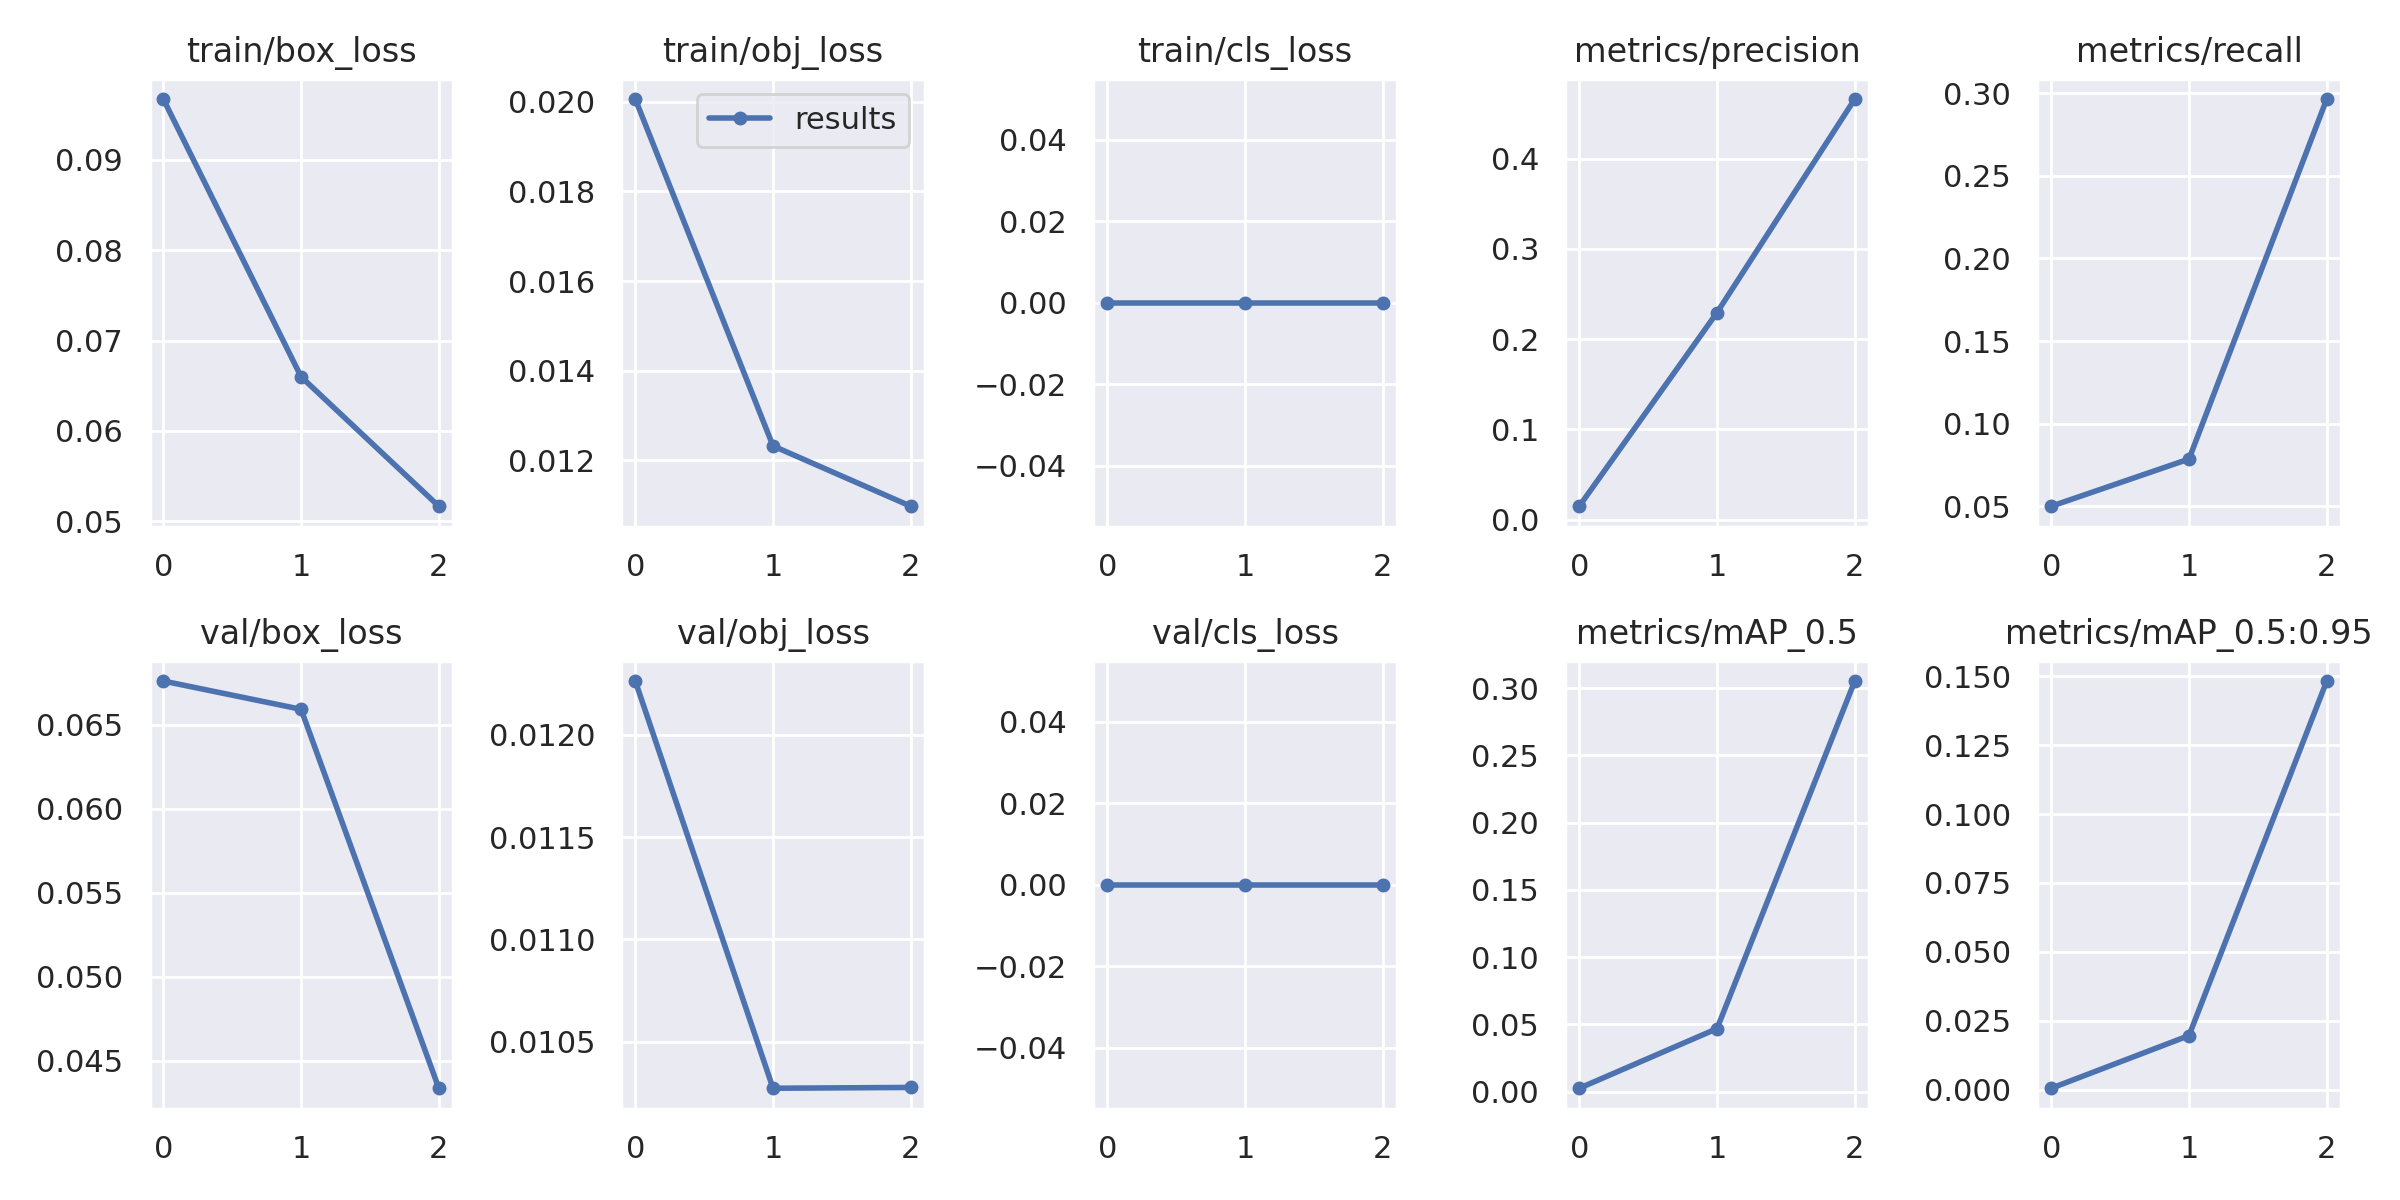